In [1]:
import scipy.io
import numpy as np
import sys
from sklearn.metrics import accuracy_score
import scipy.stats
import random
import math
import matplotlib.pyplot as plt

In [2]:
data = scipy.io.loadmat('AllSamples.mat')   #loading the data

In [3]:
#for finding membership of sample to a cluster
def find_membership(sample: list, centers: dict) -> int:
    min_dist = 999999.0
    center_index = 0

    for i in range(0, len(centers)):
        current_center = centers[i]
        sample = np.array(sample)

        #for given sample compute the distance from each center
        d = np.linalg.norm(sample - current_center)

        #find center with minimum euclidean distance
        if d < min_dist:
            min_dist = d
            center_index = i

    #return index of the center the sample belongs to
    return center_index

In [4]:
def find_centers(k: int, data: dict, new_centers: list)->list:
    samples = list(data['AllSamples'])
    for i in range(1, k):
        max_avg = -1
        max_avg_index = -1
        for l, sample in enumerate(samples):
            d = 0
            for j in range(0, i):
                sample = np.array(sample)
                curr_center = np.array(samples[new_centers[j]])
                d += np.linalg.norm(sample - curr_center)
            avg = d/len(new_centers)
            if avg > max_avg:
                if l in new_centers:
                    continue
                else:
                    max_avg = avg
                    max_avg_index = l
        new_centers.append(max_avg_index)
    return new_centers

In [5]:
#for computing the centeroids and the clusters using k-means algorithm
def k_means_plus(k: int, data: dict, random_center: list) -> (list, dict):

    print('Running algorithm for k = ', k)

    #find farthest centers compared to each other
    init_centers = find_centers(k, data, random_center)
    centers = {i: data['AllSamples'][init_centers[i]] for i in range(0, k)}
    clusters = {}

    for key, value in centers.items():
        clusters[key] = [value]

    l = 0

    #find the coordinates of the centers
    first_centeroids = centers.values()
    print('First Centeroids: ', first_centeroids)

    #while centers change, assign all samples a cluster and recompute the center
    while True:

        #assign all samples a cluster
        for i, sample in enumerate(data['AllSamples']):
            center_index = find_membership(sample, centers)
            clusters[center_index].append(sample)
        
        new_centeroids = []
        old_centeroids = centers.values()
        
        #recompute centers as average of samples of the cluster
        for samples in clusters.values():
            mu = np.average(samples, axis=0)
            new_centeroids.append(mu)

        #some transformations to prepare for comparison of centers
        old_centeroids, new_centeroids = [list(x) for x in old_centeroids], [list(x) for x in new_centeroids]
        old_centeroids, new_centeroids = list(old_centeroids), list(new_centeroids)

        for i in range(0, len(new_centeroids)):
            new_centeroids[i] = [round(x, 2) for x in new_centeroids[i]]

        for i in range(0, len(old_centeroids)):
            old_centeroids[i] = [round(x, 2) for x in old_centeroids[i]]

        #compare centers
        if new_centeroids == old_centeroids:
            break
        else:
            #store the coordinates of the new center
            for i, point in enumerate(new_centeroids):
                centers[i] = point

        #break if algorithm doesn't converge even after 500 iterations
        l+=1
        if l == 500:
            break
    
    #return final centers of computed clusters for given k
    final_centeriods = list(centers.values())
    print('Final centeroids', final_centeriods)
    print(f'It took {l} iterations.')
            
    return final_centeriods, clusters

Running algorithm for k =  2
First Centeroids:  dict_values([array([6.46270852, 5.83507122]), array([ 3.85212146, -1.08715226])])
Final centeroids [[4.9, 7.12], [4.95, 2.42]]
It took 25 iterations.
Running algorithm for k =  3
First Centeroids:  dict_values([array([6.46270852, 5.83507122]), array([ 3.85212146, -1.08715226]), array([9.26998864, 9.62492869])])
Final centeroids [[3.56, 6.51], [5.19, 2.31], [7.33, 8.03]]
It took 47 iterations.
Running algorithm for k =  4
First Centeroids:  dict_values([array([6.46270852, 5.83507122]), array([ 3.85212146, -1.08715226]), array([9.26998864, 9.62492869]), array([1.20162248, 7.68639714])])
Final centeroids [[6.57, 3.26], [2.99, 2.01], [6.98, 8.2], [3.03, 6.84]]
It took 66 iterations.
Running algorithm for k =  5
First Centeroids:  dict_values([array([6.46270852, 5.83507122]), array([ 3.85212146, -1.08715226]), array([9.26998864, 9.62492869]), array([1.20162248, 7.68639714]), array([ 6.5807212, -0.0766824])])
Final centeroids [[5.2, 5.63], [2.8

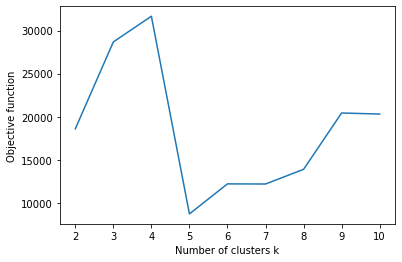

In [6]:
#driver code
results = {}
clusters = {}

#to use the same random first center for various values of k to make performance comparable
#to be run twice for different results
random_int = random.randint(0, len(data['AllSamples']))

#for given k values of 2 to 10, find clusters for given sample
for i in range(2, 11):
    random_center = [random_int]
    results[i], clusters[i] = k_means_plus(i, data, random_center)

#for plotting

#for k-values
x_points = [x for x in results.keys()]

#for objective function
y_points = []

#calculate objective function for each k
for key, values in clusters.items():
    obj_func = 0

    #calculate error for each cluster
    for cluster, samples in values.items():
        cluster_error = 0

        #calculate sum of norm of each sample belonging to the cluster
        for sample in samples:
            sample = np.array(sample)
            mu = np.array(results[key][cluster])
            cluster_error += np.linalg.norm(sample - mu)

        obj_func += cluster_error
    y_points.append(obj_func)

x_points = np.array(x_points)
y_points = np.array(y_points)

plt.plot(x_points, y_points)
plt.xlabel('Number of clusters k')
plt.ylabel('Objective function')

#plot the graph
plt.show()
